<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,93.272004,0.000384,103.272387,103.272041,0.000346
1,0.0,1.0,29.743816,0.002271,39.746087,39.744264,0.001823
2,0.0,2.0,27.299652,0.003114,37.302766,37.300116,0.002649
3,0.0,3.0,50.009517,-0.001575,60.007942,60.009835,-0.001892
4,0.0,4.0,20.455806,0.004857,30.460663,30.456315,0.004349
...,...,...,...,...,...,...,...
59995,999.0,55.0,21.543760,-0.005499,31.538261,31.543719,-0.005458
59996,999.0,56.0,48.856577,0.001056,58.857633,58.856644,0.000990
59997,999.0,57.0,97.232631,0.000352,107.232983,107.232887,0.000095
59998,999.0,58.0,50.785330,0.000927,60.786257,60.785404,0.000853


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,93.272004,0.000384,103.272387,103.272041,0.000346
1,0.0,1.0,29.743816,0.002271,39.746087,39.744264,0.001823
2,0.0,2.0,27.299652,0.003114,37.302766,37.300116,0.002649
3,0.0,3.0,50.009517,-0.001575,60.007942,60.009835,-0.001892
4,0.0,4.0,20.455806,0.004857,30.460663,30.456315,0.004349
...,...,...,...,...,...,...,...
59995,999.0,55.0,21.543760,-0.005499,31.538261,31.543719,-0.005458
59996,999.0,56.0,48.856577,0.001056,58.857633,58.856644,0.000990
59997,999.0,57.0,97.232631,0.000352,107.232983,107.232887,0.000095
59998,999.0,58.0,50.785330,0.000927,60.786257,60.785404,0.000853


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    93.272004  0.000384  103.272387  103.272041  0.000346
      1.0    29.743816  0.002271   39.746087   39.744264  0.001823
      2.0    27.299652  0.003114   37.302766   37.300116  0.002649
      3.0    50.009517 -0.001575   60.007942   60.009835 -0.001892
      4.0    20.455806  0.004857   30.460663   30.456315  0.004349
...                ...       ...         ...         ...       ...
999.0 55.0   21.543760 -0.005499   31.538261   31.543719 -0.005458
      56.0   48.856577  0.001056   58.857633   58.856644  0.000990
      57.0   97.232631  0.000352  107.232983  107.232887  0.000095
      58.0   50.785330  0.000927   60.786257   60.785404  0.000853
      59.0   87.769832 -0.001449   97.768382   97.770051 -0.001669

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    93.272004  0.000384  103.272387  103.272041  0.000346
      1.0    29.743816  0.002271   39.746087   39.744264  0.001823
      2.0    27.299652  0.003114   37.302766   37.300116  0.002649
      3.0    50.009517 -0.001575   60.007942   60.009835 -0.001892
      4.0    20.455806  0.004857   30.460663   30.456315  0.004349
...                ...       ...         ...         ...       ...
999.0 55.0   21.543760 -0.005499   31.538261   31.543719 -0.005458
      56.0   48.856577  0.001056   58.857633   58.856644  0.000990
      57.0   97.232631  0.000352  107.232983  107.232887  0.000095
      58.0   50.785330  0.000927   60.786257   60.785404  0.000853
      59.0   87.769832 -0.001449   97.768382   97.770051 -0.001669

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,93.272004,0.000384,103.272387,103.272041,0.000346
1,0.0,1.0,29.743816,0.002271,39.746087,39.744264,0.001823
2,0.0,2.0,27.299652,0.003114,37.302766,37.300116,0.002649
3,0.0,3.0,50.009517,-0.001575,60.007942,60.009835,-0.001892
4,0.0,4.0,20.455806,0.004857,30.460663,30.456315,0.004349
...,...,...,...,...,...,...,...
59995,999.0,55.0,21.543760,-0.005499,31.538261,31.543719,-0.005458
59996,999.0,56.0,48.856577,0.001056,58.857633,58.856644,0.000990
59997,999.0,57.0,97.232631,0.000352,107.232983,107.232887,0.000095
59998,999.0,58.0,50.785330,0.000927,60.786257,60.785404,0.000853


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    93.272004  0.000384  103.272387  103.272041  0.000346
      1.0    29.743816  0.002271   39.746087   39.744264  0.001823
      2.0    27.299652  0.003114   37.302766   37.300116  0.002649
      3.0    50.009517 -0.001575   60.007942   60.009835 -0.001892
      4.0    20.455806  0.004857   30.460663   30.456315  0.004349
...                ...       ...         ...         ...       ...
999.0 55.0   21.543760 -0.005499   31.538261   31.543719 -0.005458
      56.0   48.856577  0.001056   58.857633   58.856644  0.000990
      57.0   97.232631  0.000352  107.232983  107.232887  0.000095
      58.0   50.785330  0.000927   60.786257   60.785404  0.000853
      59.0   87.769832 -0.001449   97.768382   97.770051 -0.001669

[60000 rows x 5 columns]

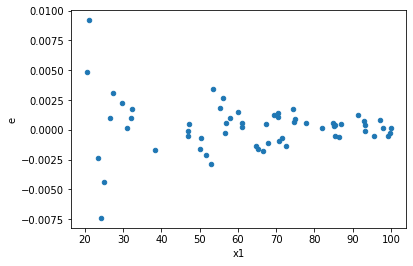

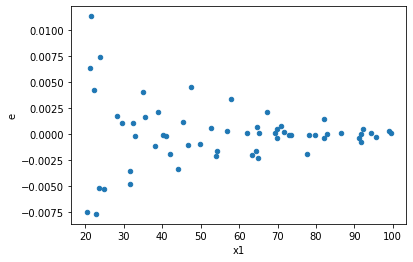

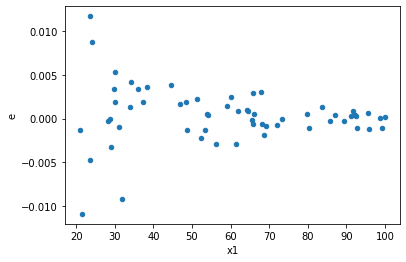

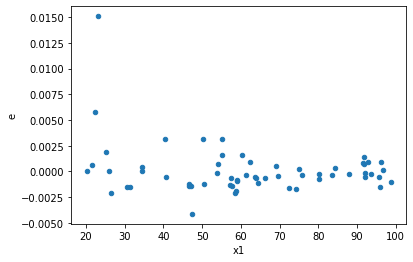

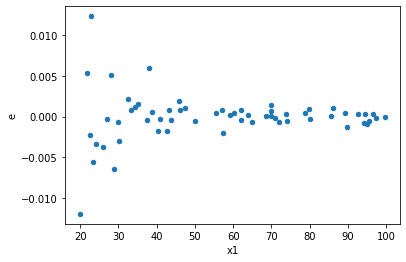

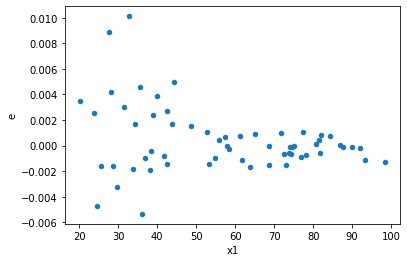

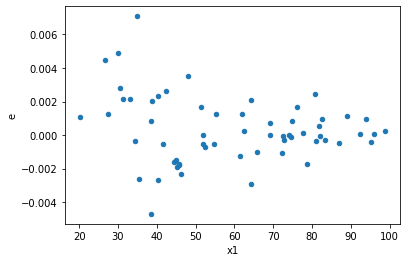

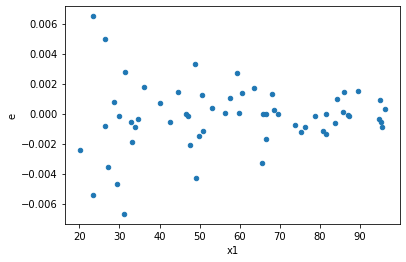

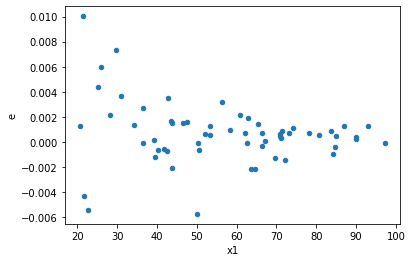

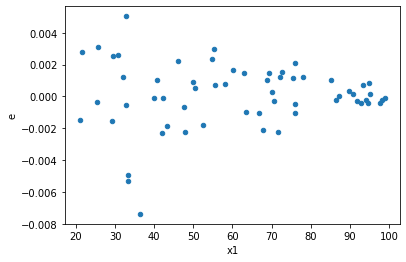

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,0.00024312304473504183,1.2718733159701495e-05,1.0570567162393123e-05,5.529883982478911e-07,0.05231397613320658,8.636227828604849e-10,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,0.0004884777633551367,1.1962905305142636e-05,2.1238163624136378e-05,5.201263176148972e-07,0.02449017376548475,2.461945492548566e-13,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,0.0005538956825263369,2.3441650323553463e-05,2.408242097940595e-05,1.0192021879805854e-06,0.042321417304852976,9.22738868951923e-11,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,0.00029252869072993084,1.4270440276565684e-05,1.2718638727388298e-05,6.204539250680733e-07,0.04878304497571652,4.1504957098751114e-10,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,0.0004993921039271213,9.597864221542311e-06,2.1712700170744406e-05,4.1729844441488307e-07,0.019219094867673304,1.690982629425401e-14,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,0.00034388642062845666,1.2752826780157462e-05,1.4951583505585072e-05,5.544707295720636e-07,0.03708441513000576,2.246519038632947e-11,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,0.0001530960406400756,1.724035305469523e-05,6.656349593046765e-06,7.495805675954448e-07,0.11261135809009462,1.8034678394934548e-06,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,0.00022876877527364779,1.7715201931896577e-05,9.9464684901586e-06,7.702261709520251e-07,0.07743714985013174,4.7777291243515456e-08,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,0.00028469664869379727,1.8462955613859613e-05,1.2378115160599881e-05,8.027372006025918e-07,0.06485132753957096,7.958946176401114e-09,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64